In [73]:
# Dependencies
import tweepy
import numpy as np
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [74]:
# Target Account
#target_terms = ("@FOXNEWS", "@CBS", "@CNN", "@NYtimes","@BBC")
target_terms = ("FOXNEWS", "CBS", "CNN", "NYtimes","BBC")
#target_user = "foxnews"

#
#
#
#"NYtimes"
# Counter


# Variables for holding sentiments
sentiments = []

# Variable for max_id


for target in target_terms:
    # Loop through 5 pages of tweets (total 100 tweets)
    
    #print(target)
    oldest_tweet = None
    counter = 1
    
    if target == "FOXNEWS":
        color = "brown"
    elif target == "CBS":
        color = "blue"
    elif target == "CNN":
        color = "green"
    elif target == "NYtimes":
        color = "red"
    elif target == "BBC":
        color = "orange"
    else: color = "grey"
    
    for x in range(5):
    #for x in range(1):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target, max_id = oldest_tweet)
    

        # Loop through all tweets 
        for tweet in public_tweets:

            # Print Tweets
            print(f"Tweet {target}: {tweet['text']}")
            #print(json.dumps(tweet, sort_keys=True, indent=4))
            


            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
            
            
            # Add sentiments for each tweet into a list
            sentiments.append({"Source":   target,
                               "Date":     tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral":  neg, 
                               "Color":    color,
                               "Tweets Ago": counter})

            # Add to counter 
            counter += 1

Tweet FOXNEWS: StormBreaker: Powerful bomb penetrates bad weather, spells bad news for bad guys https://t.co/TC0TmbKlkt
Tweet FOXNEWS: Amazon face recognition wrongly tagged lawmakers as police suspects, fueling racial bias concerns https://t.co/We26AHFVcQ
Tweet FOXNEWS: Mama duck with 76 ducklings on Minnesota lake captured in stunning photos https://t.co/oME6T24vwk https://t.co/UwItJBVynu
Tweet FOXNEWS: Firefighters regroup while battling the Carr Fire in Shasta, California. https://t.co/8tozNg1d55 https://t.co/sDpqbteTCp
Tweet FOXNEWS: Utah man tackles fleeing suspect 'like NFL hardest hits' to aid police officer https://t.co/GGN6Nuv1cl
Tweet FOXNEWS: Boy with deformed legs undergoes life-changing surgery at Tebow CURE Hospital https://t.co/uVBbJFPemZ
Tweet FOXNEWS: OPINION: Agriculture @SecretarySonny: Here's how Trump will protect American farmers hit by Chinese tariffs https://t.co/ZGZdUHpt35
Tweet FOXNEWS: Chip Gaines releases lead paint safety video following EPA violations, $4

Tweet FOXNEWS: .@Judgenap: Farewell to someone I loved with all my heart – who gave me his values and much more. https://t.co/4YYqFN9ifd
Tweet FOXNEWS: Alligator found in basement of Washington D.C. home, police say. https://t.co/gwZ4XBWxBq
Tweet FOXNEWS: McDonald's worker, customer get into vicious brawl over soda. https://t.co/bUgqmTNffW
Tweet FOXNEWS: 'Big one' coming? Earthquakes off the West Coast could eventually trigger a global event. https://t.co/NXm1U3emrP
Tweet FOXNEWS: Texas prisoner escapes restraints, climbs on top of moving car mid-transfer, authorities say. https://t.co/NdNc8EzYzM
Tweet FOXNEWS: Officers who used coin flip to decide whether to arrest woman have been fired. https://t.co/00pIk9Q6HB
Tweet FOXNEWS: Tennessee mom allegedly left baby in hot vehicle to drink on National Tequila Day. https://t.co/g3BLQzkb2s
Tweet FOXNEWS: .@RepMaxineWaters Suggests in Church Sermon That She Was Sent by God to Stop Trump. https://t.co/JZ18zQV0p4
Tweet FOXNEWS: Colorado man spots

Tweet CBS: RT @StrangeAngel: Mastermind or maniac? Explore the brilliant mind of Jack Parsons in #StrangeAngel. Now streaming on CBS All Access: https…
Tweet CBS: No pain, no gain, ALL Hart! Just one month until the premiere of @TKOCBS hosted by @KevinHart4real. https://t.co/C1yMCglxVn
Tweet CBS: RT @TheNeighborhood: Welcome to #TheNeighborhood, @BethBehrs! The @2BrokeGirls star returns to @CBS in a new sitcom alongside @CedEntertain…
Tweet CBS: In case you missed it, watch the entire #TonyAwards now: https://t.co/Bm0yNV3Ff3 https://t.co/3GA5otlcPa
Tweet CBS: How do you know @SaraBareilles and @joshgroban's music? #TonyAwards https://t.co/POMXBORfUT
Tweet CBS: Here are all the performances from the 2018 #TonyAwards: https://t.co/gN4ItpFlRd https://t.co/fSMNBXKC9r
Tweet CBS: See the complete list of winners from the 2018 #TonyAwards: https://t.co/9XK6CGeber https://t.co/HkUIN4Quej
Tweet CBS: An end to a magical evening. The Band's Visit wins for Best Musical! #TonyAwards https://t.co/OD

Tweet CNN: Miyako Chiyo, the oldest person in Japan and the world, died Sunday at age 117, according to the country's Health M… https://t.co/EW7sfa5rBb
Tweet CNN: Facebook removes four videos on pages operated by Alex Jones and InfoWars https://t.co/AbI7EpLln0 https://t.co/Lwlw18W8kN
Tweet CNN: Consumer groups blasted Education Secretary Betsy DeVos this week over a new rule they say would make it harder for… https://t.co/sQX5mriSyc
Tweet CNN: How DNA and other methods are used in identifying deceased US troops https://t.co/dJxFMGQwLH https://t.co/h7PMfLaD2J
Tweet CNN: The best travel photos of 2018 (so far) https://t.co/rKraZZ6eeB https://t.co/cvUz4ZqeUK
Tweet CNN: Twitter made Trump. Will it un-make him? https://t.co/j0FM4iqyxo https://t.co/oal6ZBkAkE
Tweet CNN: Facebook removes four videos on pages operated by Alex Jones and InfoWars https://t.co/9Iwa59NPxH https://t.co/AgWyqdhtuT
Tweet CNN: The rise of ISIS in Iraq and Syria reflected a craving for social order that underlies many 

Tweet NYtimes: The Betsy DeVos approach would undo nearly a decade of efforts to create an accountability system for the largely u… https://t.co/WYhV2qjVZ6
Tweet NYtimes: RT @lauriegnyt: A @nytimes exclusive: The National Prayer Breakfast has become an international influence-peddling bazaar. Lobbyists broker…
Tweet NYtimes: Breaking News: CBS signaled it would investigate its CEO, Les Moonves, for misconduct allegations to be published b… https://t.co/IVLtKdulTI
Tweet NYtimes: Inmates in Idaho hacked their accounts with JPay, a prison financial services provider, and stole nearly $225,000 i… https://t.co/NSoZB4krjp
Tweet NYtimes: RT @jennyschuessler: UPDATE: Auction house says it is working on deal for Rosa Parks family house that was famously saved from demolition f…
Tweet NYtimes: Modern Love: "It wasn’t easy to meet anyone where I was for all of my 20s and nearly half of my 30s, at the prison… https://t.co/WIl4ho6OMu
Tweet NYtimes: Here are 5 delicious recipes for a school (or work

Tweet NYtimes: 10 new books recommended by critics and editors at The New York Times https://t.co/wdjP7c3D28
Tweet NYtimes: RT @ABarnardNYT: The tech journos at @nytimes asked how I use tech to cover the Middle East. I don't use fancy tools. But covering Syria's…
Tweet NYtimes: Microsoft employees questioned their chief executive, calling for the software maker to cancel its contract with ICE https://t.co/UovvIZnZYW
Tweet NYtimes: Despite Egypt’s Dismal Human Rights Record, U.S. Restores Military Aid https://t.co/pbTS1YIyFH
Tweet NYtimes: “Everybody was flabbergasted that a little girl like me could fly these big airplanes all by oneself,” Mary Ellis s… https://t.co/wH0oEOHP72
Tweet NYtimes: President Trump shelved his predecessor’s trade talks with Europe. Now, he wants to resume similar negotiations. https://t.co/P6aQNruCJb
Tweet NYtimes: Remains believed to be those of American servicemen were flown out of North Korea, 65 years after the end of combat… https://t.co/jwDjZF0ksg
Tweet 

Tweet BBC: "I would like to do it all over again. There was a war on but otherwise it was absolutely wonderful." ❤️️

Remember… https://t.co/1cSKgxW5gF
Tweet BBC: 😮 You don't want to get between two fighting kangaroos!
#LifeStory https://t.co/xX95kVkWJU
Tweet BBC: A record number of primary school children are leaving school severely obese, according to new figures from Public… https://t.co/nmc8w0pnGW
Tweet BBC: RT @BBCEngland: The last living female pilot from World War Two, Mary Ellis, has died aged 101 at her home on the Isle of Wight https://t.c…
Tweet BBC: This school is tackling their single-use plastic problem one lunchbox at a time.
#PlasticsAction https://t.co/dBJBC46C06
Tweet BBC: We call violence an ‘epidemic’ – and there is reason to take that literally... treating it like an infectious disea… https://t.co/871oH89IB6
Tweet BBC: ♨️😴 Having trouble sleeping in this heatwave?
#HeatwaveUK https://t.co/N8Nstm5gC7
Tweet BBC: Colin Firth stars in an award-winning adaptation of Jan

In [33]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
#sentiments_pd.head(200)

,Color,Compound,Date,Negative,Neutral,Positive,Source,Tweets Ago
0,brown,0.6908,Wed Jul 25 18:26:26 +0000 2018,0.657,0.073,0.270,FOXNEWS,1
1,brown,-0.3875,Wed Jul 25 18:21:13 +0000 2018,0.832,0.168,0.000,FOXNEWS,2
2,brown,-0.3400,Wed Jul 25 18:15:54 +0000 2018,0.821,0.179,0.000,FOXNEWS,3
3,brown,0.0000,Wed Jul 25 18:06:41 +0000 2018,1.000,0.000,0.000,FOXNEWS,4
4,brown,0.0516,Wed Jul 25 17:53:53 +0000 2018,0.787,0.102,0.110,FOXNEWS,5
5,brown,-0.5994,Wed Jul 25 17:44:18 +0000 2018,0.782,0.218,0.000,FOXNEWS,6
6,brown,-0.1531,Wed Jul 25 17:41:08 +0000 2018,0.862,0.138,0.000,FOXNEWS,7
7,brown,0.0000,Wed Jul 25 17:31:50 +0000 2018,1.000,0.000,0.000,FOXNEWS,8
8,brown,0.0000,Wed Jul 25 17:22:02 +0000 2018,1.000,0.000,0.000,FOXNEWS,9
9,brown,0.0000,Wed Jul 25 17:18:12 +0000 2018,1.000,0.000,0.000,FOXNEWS,10


[9.0, 6.0]


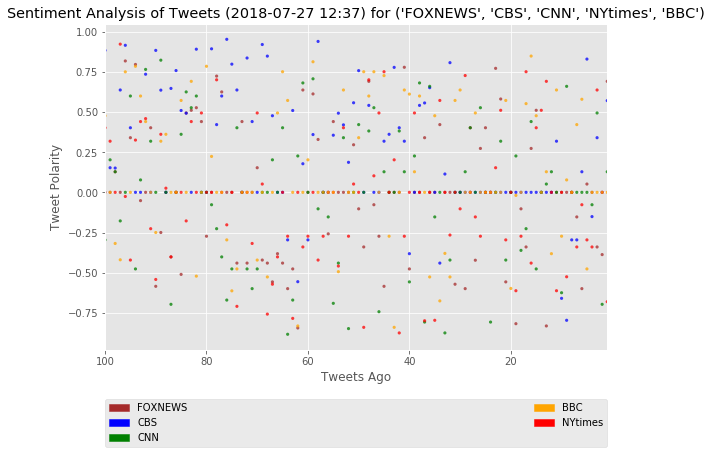

In [75]:
# Create plot
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
#plt.plot(x_vals,
#         y_vals, marker="o", linewidth=0.5,
#         alpha=0.8)

plt.scatter(x_vals, y_vals, marker="o",facecolors=sentiments_pd['Color'], edgecolors="none",
            s=10, alpha=0.75, )


brown_patch = mpatches.Patch(color='brown', label='FOXNEWS')
blue_patch = mpatches.Patch(color='blue', label='CBS')
green_patch = mpatches.Patch(color='green', label='CNN')
red_patch = mpatches.Patch(color='red', label='NYtimes')
org_patch = mpatches.Patch(color='orange', label='BBC')
patch_list = [brown_patch,blue_patch, green_patch,org_patch,red_patch ]

plt.legend(handles = [brown_patch,blue_patch, green_patch,org_patch,red_patch ], bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0)
#plt.legend(loc='best')

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_terms}")
plt.xlim([x_vals.max(),x_vals.min()]) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

fig_size = plt.rcParams["figure.figsize"]
print (fig_size)
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size



plt.show()

In [77]:

fox_mean = sentiments_pd['Compound'][sentiments_pd['Source'] == 'FOXNEWS'].mean()
cbs_mean = sentiments_pd['Compound'][sentiments_pd['Source'] == 'CBS'].mean()
bbc_mean = sentiments_pd['Compound'][sentiments_pd['Source'] == 'BBC'].mean()
cnn_mean = sentiments_pd['Compound'][sentiments_pd['Source'] == 'CNN'].mean()
nyt_mean = sentiments_pd['Compound'][sentiments_pd['Source'] == 'NYtimes'].mean()

#print (nyt_mean)


In [57]:
sent_summary_table = pd.DataFrame({
    "Source":['Fox', 'CBS', 'BBC', 'CNN', 'NYtimes'] ,  
    "Compound Sentiment":[fox_mean, cbs_mean, bbc_mean, cnn_mean, nyt_mean],
    "Colors":['brown', 'blue', 'orange','green','red']
    })
sent_summary_table


,Colors,Compound Sentiment,Source
0,brown,-0.000530,Fox
1,blue,0.246752,CBS
2,orange,0.109421,BBC
3,green,-0.010696,CNN
4,red,-0.031435,NYtimes


In [82]:
#y_tick = np.arange(-1.0, 1.0, .1)
y_tick = np.arange(-1.0, 1.0, .05)
y_tick
#plt.bar()

array([-1.0000000e+00, -9.5000000e-01, -9.0000000e-01, -8.5000000e-01,
       -8.0000000e-01, -7.5000000e-01, -7.0000000e-01, -6.5000000e-01,
       -6.0000000e-01, -5.5000000e-01, -5.0000000e-01, -4.5000000e-01,
       -4.0000000e-01, -3.5000000e-01, -3.0000000e-01, -2.5000000e-01,
       -2.0000000e-01, -1.5000000e-01, -1.0000000e-01, -5.0000000e-02,
        8.8817842e-16,  5.0000000e-02,  1.0000000e-01,  1.5000000e-01,
        2.0000000e-01,  2.5000000e-01,  3.0000000e-01,  3.5000000e-01,
        4.0000000e-01,  4.5000000e-01,  5.0000000e-01,  5.5000000e-01,
        6.0000000e-01,  6.5000000e-01,  7.0000000e-01,  7.5000000e-01,
        8.0000000e-01,  8.5000000e-01,  9.0000000e-01,  9.5000000e-01])

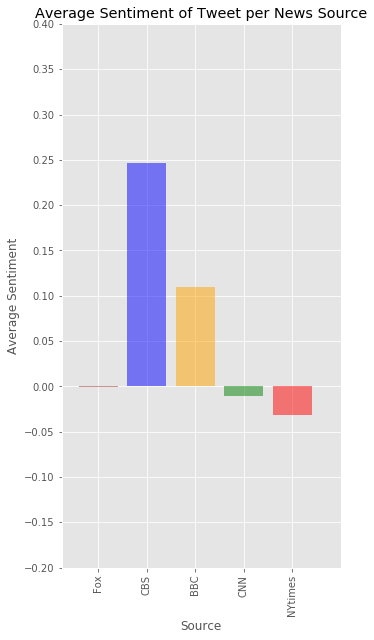

In [86]:
x_axis = np.arange(len(sent_summary_table))
tick_locations = [value for value in x_axis]

color = sent_summary_table["Colors"]
plt.figure(figsize=(5,10))

plt.bar(x_axis, sent_summary_table["Compound Sentiment"], color=color, alpha=0.5, align="center")
plt.xticks(tick_locations, sent_summary_table["Source"], rotation="vertical")
#test
plt.yticks(y_tick)

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(-.2,.4)

plt.title("Average Sentiment of Tweet per News Source")
plt.xlabel("Source")
plt.ylabel("Average Sentiment")

#plt.tight_layout()
#plt.savefig("avg_sentiment.png")
plt.show()